<a href="https://colab.research.google.com/github/iamrafinawaz/Data-Analytics/blob/main/Evaluation_Metrics_and_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. **What does R-squared represent in a regression model?**
   - R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables in the model. It indicates the goodness of fit of the model.

2. **What are the assumptions of linear regression?**
   - The assumptions are linearity, independence, homoscedasticity, normality of residuals, and no multicollinearity.

3. **What is the difference between R-squared and Adjusted R-squared?**
   - R-squared measures the proportion of variance explained by the model, while Adjusted R-squared adjusts for the number of predictors and provides a more accurate measure.

4. **Why do we use Mean Squared Error (MSE)?**
   - MSE is used to measure the average squared difference between observed and predicted values. It helps evaluate the accuracy of a regression model.

5. **What does an Adjusted R-squared value of 0.85 indicate?**
   - It indicates that 85% of the variance in the dependent variable is explained by the independent variables, adjusted for the number of predictors.

6. **How do we check for normality of residuals in linear regression?**
   - Normality can be checked using a Q-Q plot or a histogram of residuals to ensure they follow a normal distribution.

7. **What is multicollinearity, and how does it impact regression?**
   - Multicollinearity occurs when independent variables are highly correlated. It can lead to unreliable coefficient estimates and inflated standard errors.

8. **What is Mean Absolute Error (MAE)?**
   - MAE measures the average absolute difference between observed and predicted values. It provides a straightforward measure of model accuracy.

9. **What are the benefits of using an ML pipeline?**
   - ML pipelines automate workflows, ensure reproducibility, enable easy model updates, and streamline the integration of preprocessing, training, and evaluation steps.

10. **Why is RMSE considered more interpretable than MSE?**
    - RMSE is in the same units as the dependent variable, making it easier to interpret the error magnitude compared to MSE.

11. **What is pickling in Python, and how is it useful in ML?**
    - Pickling is a way to serialize and save Python objects. In ML, it is used to save trained models for later use without retraining.

12. **What does a high R-squared value mean?**
    - A high R-squared value indicates that the model explains a large proportion of the variance in the dependent variable.

13. **What happens if linear regression assumptions are violated?**
    - Violating assumptions can lead to biased, inefficient, and inconsistent parameter estimates, affecting the model's reliability.

14. **How can we address multicollinearity in regression?**
    - Multicollinearity can be addressed by removing highly correlated predictors, using regularization techniques, or combining correlated variables.

15. **How can feature selection improve model performance in regression analysis?**
    - Feature selection removes irrelevant or redundant predictors, reducing model complexity, improving interpretability, and enhancing prediction accuracy.

16. **How is Adjusted R-squared calculated?**
    - Adjusted R-squared is calculated by adjusting R-squared for the number of predictors and sample size to provide a more accurate measure of model fit.

17. **Why is MSE sensitive to outliers?**
    - MSE squares the errors, giving more weight to larger errors. Outliers can disproportionately impact the MSE value, making it sensitive to extreme values.

18. **What is the role of homoscedasticity in linear regression?**
    - Homoscedasticity ensures that the variance of residuals is constant across all levels of the independent variables. It is crucial for reliable coefficient estimates and valid hypothesis tests.

19. **What is Root Mean Squared Error (RMSE)?**
    - RMSE measures the square root of the average squared difference between observed and predicted values. It provides an interpretable measure of model accuracy.

20. **Why is pickling considered risky?**
    - Pickling can be risky due to security vulnerabilities, as unpickling data from untrusted sources can execute arbitrary code, leading to potential security breaches.

21. **What alternatives exist to pickling for saving ML models?**
    - Alternatives include joblib, which is more efficient for large data, and ONNX, which provides interoperability across different frameworks.

22. **What is heteroscedasticity, and why is it a problem?**
    - Heteroscedasticity occurs when the variance of residuals is not constant. It can lead to inefficient estimates and invalid hypothesis tests.

23. **How can interaction terms enhance a regression model's predictive power?**
    - Interaction terms capture the combined effect of two or more predictors, providing a more accurate representation of complex relationships and improving model performance.



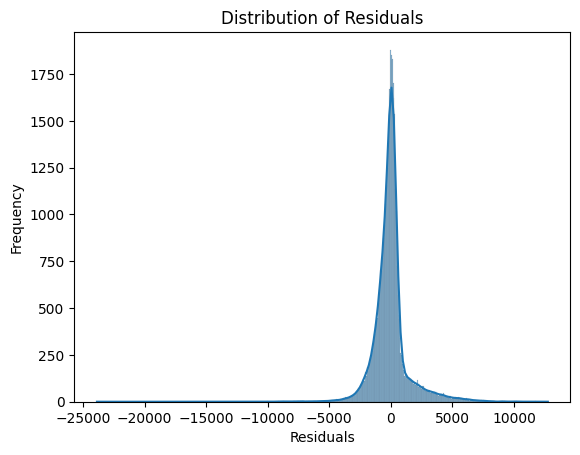

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

diamonds = sns.load_dataset('diamonds')
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [4]:
#2
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diamonds = sns.load_dataset('diamonds')
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 2242178.9040856035
Mean Absolute Error (MAE): 888.4808633901026
Root Mean Squared Error (RMSE): 1497.3906985438382


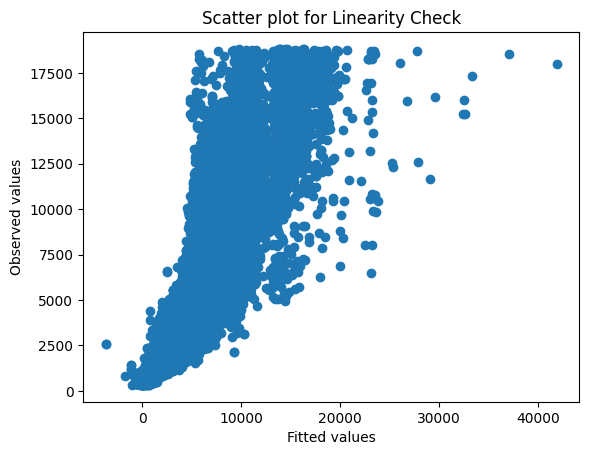

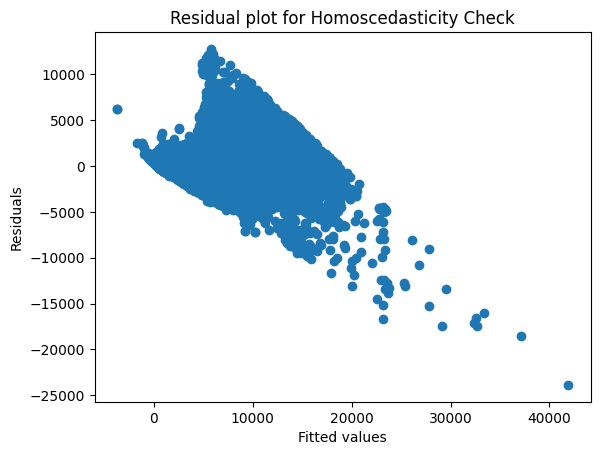

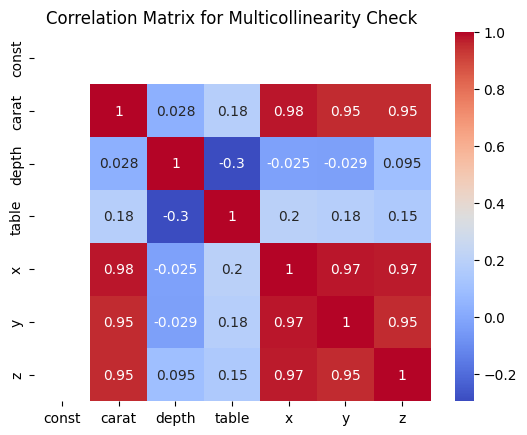

In [6]:
#3
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

diamonds = sns.load_dataset('diamonds')
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
residuals = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, y)
plt.title('Scatter plot for Linearity Check')
plt.xlabel('Fitted values')
plt.ylabel('Observed values')
plt.show()
plt.scatter(fitted, residuals)
plt.title('Residual plot for Homoscedasticity Check')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Multicollinearity Check')
plt.show()


In [8]:
# 4
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

diamonds = sns.load_dataset('diamonds')
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: R-squared score = {r2}")


Linear Regression: R-squared score = 0.8589542625888938
Ridge Regression: R-squared score = 0.858953546861451
Lasso Regression: R-squared score = 0.8589514346273637


In [9]:
# 5
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

diamonds = sns.load_dataset('diamonds')
X = diamonds[['carat']]
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared score: {r2_score(y_test, y_pred)}")


Coefficients: [7768.91049036]
Intercept: -2261.9117456492177
R-squared score: 0.8489390686155808


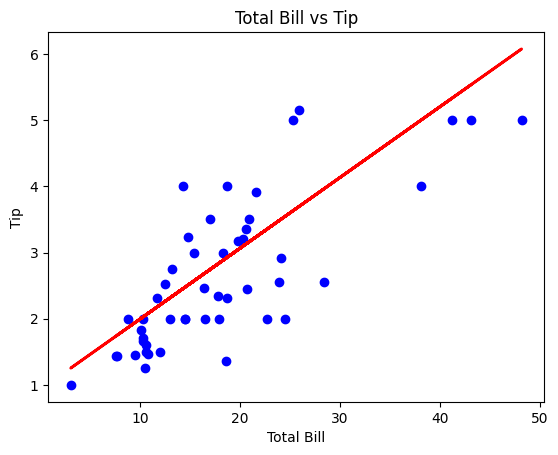

In [11]:
# 6
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

tips = sns.load_dataset('tips')
X = tips[['total_bill']]
y = tips['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()


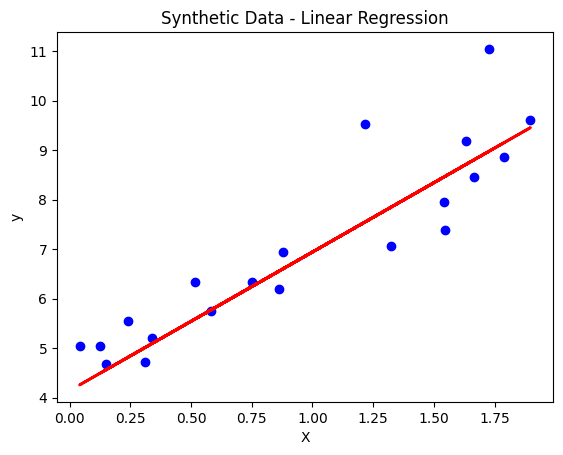

In [12]:
#7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Synthetic Data - Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [13]:
# 8
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diamonds = sns.load_dataset('diamonds')
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)


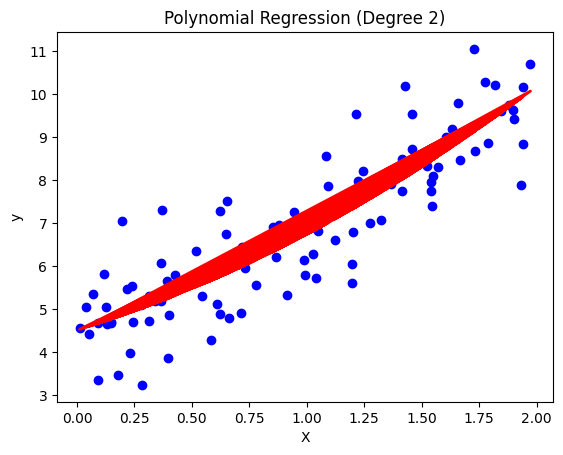

In [14]:
# 9
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X[:, 0], y, color='blue')
plt.plot(X[:, 0], model.predict(X_poly), color='red', linewidth=2)
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [15]:
#10
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

print(f"Coefficient: {model.coef_[0][0]}")
print(f"Intercept: {model.intercept_[0]}")


Coefficient: 2.7701133864384837
Intercept: 4.215096157546747


In [16]:
#11
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

degrees = [1, 2, 3]
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Degree {degree}: R-squared score = {r2_score(y_test, y_pred)}")


Degree 1: R-squared score = 0.8072059636181392
Degree 2: R-squared score = 0.8124730482414345
Degree 3: R-squared score = 0.8106419219272819


In [17]:
#12
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.random.rand(100, 2)
y = 3 + 5 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared score: {r2_score(y_test, y_pred)}")


Coefficients: [5.25451356 2.4741599 ]
Intercept: 2.716671499389689
R-squared score: 0.7353875662272447


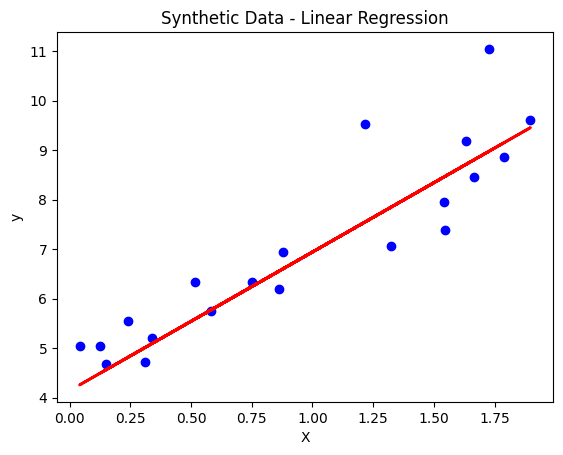

In [18]:
#13
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Synthetic Data - Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [19]:
#14
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

np.random.seed(42)
X = pd.DataFrame(np.random.rand(100, 5), columns=['A', 'B', 'C', 'D', 'E'])

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)



  feature       VIF
0       A  2.878542
1       B  3.295998
2       C  3.028350
3       D  3.944296
4       E  3.001048


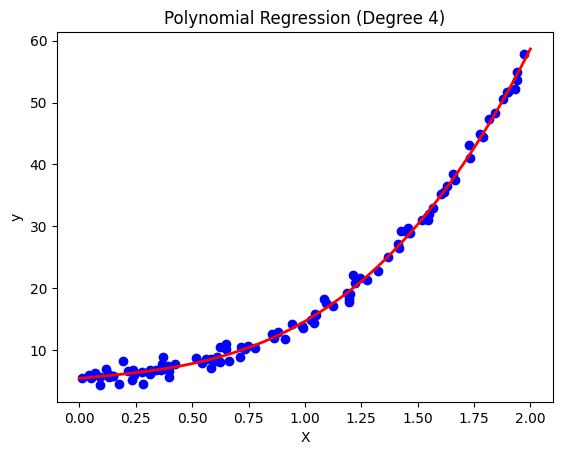

In [20]:
#15
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 5 + 3 * X + 4 * X**2 + 2 * X**3 + X**4 + np.random.randn(100, 1)

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

X_new = np.linspace(0, 2, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

plt.scatter(X, y, color='blue')
plt.plot(X_new, y_new, color='red', linewidth=2)
plt.title('Polynomial Regression (Degree 4)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [21]:
#16
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.random.rand(100, 3)
y = 5 + 2 * X[:, 0] + 3 * X[:, 1] + 4 * X[:, 2] + np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f"R-squared score: {r2_score(y_test, y_pred)}")


R-squared score: 0.572530205321585


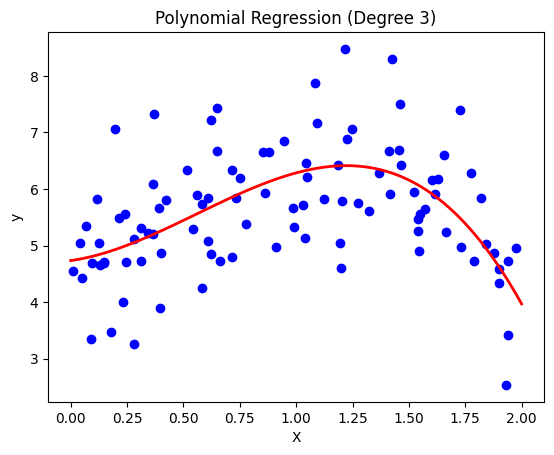

In [22]:
#17
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 0.5 * X**2 - X**3 + np.random.randn(100, 1)

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

X_new = np.linspace(0, 2, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

plt.scatter(X, y, color='blue')
plt.plot(X_new, y_new, color='red', linewidth=2)
plt.title('Polynomial Regression (Degree 3)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [23]:
#18
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.random.rand(100, 5)
y = 3 + 2 * X[:, 0] + 4 * X[:, 1] + 5 * X[:, 2] + 1.5 * X[:, 3] + 2.5 * X[:, 4] + np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"R-squared score: {r2_score(y_test, y_pred)}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


R-squared score: 0.7674143991220302
Coefficients: [1.65295867 3.76607667 5.64790329 1.6455846  2.05435983]
Intercept: 3.145984743986989


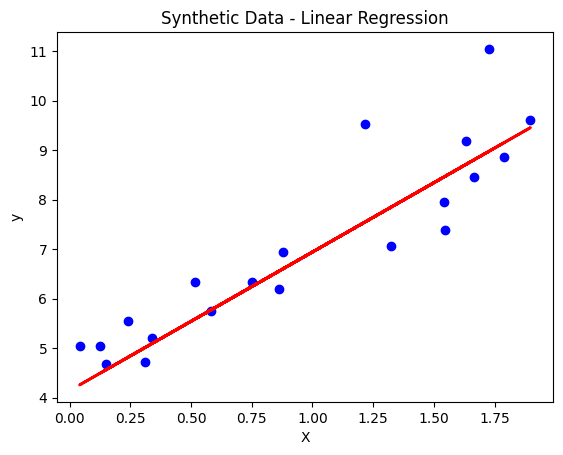

In [24]:
#19
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Synthetic Data - Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [25]:
#20
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.random.rand(100, 3)
y = 5 + 2 * X[:, 0] + 3 * X[:, 1] + 4 * X[:, 2] + np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"R-squared score: {r2_score(y_test, y_pred)}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


R-squared score: 0.5725302053215848
Coefficients: [2.10589767 2.92460599 4.68605925]
Intercept: 4.914989558367081


In [26]:
#21
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model, 'linear_regression_model.joblib')
loaded_model = joblib.load('linear_regression_model.joblib')


In [27]:
#22
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

tips = sns.load_dataset('tips')
tips_encoded = pd.get_dummies(tips, drop_first=True)

X = tips_encoded.drop('tip', axis=1)
y = tips_encoded['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"R-squared score: {model.score(X_test, y_test)}")


R-squared score: 0.43730181943482505


In [28]:
#23
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.random.rand(100, 2)
y = 3 + 5 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=1.0)
linear_model = LinearRegression()

ridge_model.fit(X_train, y_train)
linear_model.fit(X_train, y_train)

ridge_pred = ridge_model.predict(X_test)
linear_pred = linear_model.predict(X_test)

print(f"Ridge Regression: Coefficients = {ridge_model.coef_}, R-squared score = {r2_score(y_test, ridge_pred)}")
print(f"Linear Regression: Coefficients = {linear_model.coef_}, R-squared score = {r2_score(y_test, linear_pred)}")



Ridge Regression: Coefficients = [4.66511598 2.15424179], R-squared score = 0.720933118456687
Linear Regression: Coefficients = [5.25451356 2.4741599 ], R-squared score = 0.7353875662272447


In [29]:
#24
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

np.random.seed(42)
X = np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

model = LinearRegression()
scores = cross_val_score(model, X, y, scoring='r2', cv=5)

print(f"Cross-Validation R-squared scores: {scores}")
print(f"Mean R-squared score: {np.mean(scores)}")


Cross-Validation R-squared scores: [0.27063245 0.14615562 0.27220857 0.56496434 0.38890332]
Mean R-squared score: 0.3285728596911464


In [30]:
#25
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

degrees = [1, 2, 3, 4]
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Degree {degree}: R-squared score = {r2_score(y_test, y_pred)}")


Degree 1: R-squared score = 0.8072059636181392
Degree 2: R-squared score = 0.8124730482414345
Degree 3: R-squared score = 0.8106419219272819
Degree 4: R-squared score = 0.7967572186646257
